<a href="https://colab.research.google.com/github/jcmachicao/gestion_proyectos/blob/main/pm__secuencias_grafos_ruta_critica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.DiGraph()
# Add nodes for each task (A, B, C) with their estimated durations
G.add_node("A", duration=5)
G.add_node("B", duration=3)
G.add_node("C", duration=5)
G.add_node("D", duration=3)
G.add_node("E", duration=2)
# Add directed edges to represent task dependencies
G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "D")
G.add_edge("B", "D")
G.add_edge("D", "E")

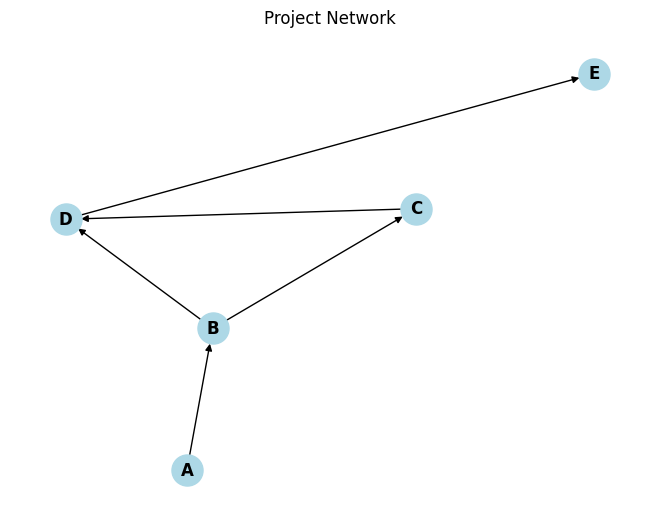

In [ ]:
# Draw the graph
pos = nx.spring_layout(G)  # Layout algorithm for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold')
edge_labels = {(i, j): G[i][j].get('weight', '') for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Project Network")
plt.show()

In [ ]:
G.edges()

OutEdgeView([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')])

In [ ]:
# Calculate the earliest start and finish times using topological sort
earliest_times = nx.topological_sort(G)
earliest_times

<generator object topological_sort at 0x7885f91e4040>

In [ ]:
for node in earliest_times:
    if len(list(G.predecessors(node))) == 0:
        G.nodes[node]["earliest_start"] = 0
    else:
        G.nodes[node]["earliest_start"] = max(
            [G.nodes[predecessor]["earliest_finish"] for predecessor in G.predecessors(node)]
        )
    G.nodes[node]["earliest_finish"] = G.nodes[node]["earliest_start"] + G.nodes[node]["duration"]

# Calculate the latest start and finish times by working backward
latest_times = list(reversed(list(nx.topological_sort(G))))
for node in latest_times:
    if len(list(G.successors(node))) == 0:
        G.nodes[node]["latest_finish"] = G.nodes[node]["earliest_finish"]
    else:
        G.nodes[node]["latest_finish"] = min(
            [G.nodes[successor]["latest_start"] for successor in G.successors(node)]
        )
    G.nodes[node]["latest_start"] = G.nodes[node]["latest_finish"] - G.nodes[node]["duration"]

# Calculate slack for each task (LS - ES)
for node in G.nodes:
    G.nodes[node]["slack"] = G.nodes[node]["latest_start"] - G.nodes[node]["earliest_start"]

# Find the critical path by identifying tasks with zero slack
critical_path = [node for node in G.nodes if G.nodes[node]["slack"] == 0]

print("Critical Path:", critical_path)

Critical Path: ['A', 'B', 'C', 'D', 'E']
